## Lab 1
Responsible AI

- Diego Córdova
- Carné: 20212

In [1]:
import math
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

#### 0. Cargar los datos de estatura y peso

In [2]:
url = 'http://wiki.stat.ucla.edu/socr/index.php?title=SOCR_Data_Dinov_020108_HeightsWeights&oldid=12529'

height_weight_df = pd.read_html(url)[1][['Height(Inches)','Weight(Pounds)']]

In [3]:
height_weight_df

,Height(Inches),Weight(Pounds)
0,65.78,112.99
1,71.52,136.49
2,69.40,153.03
3,68.22,142.34
4,67.79,144.30
...,...,...
195,65.80,120.84
196,66.11,115.78
197,68.24,128.30
198,68.02,127.47


### 1. Count records in the dataframe

In [4]:
height_weight_df.shape[0]

200

### 2. Crear una regresion lineal con estatura como variable explicatoria y peso como variable explicada

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = height_weight_df['Height(Inches)'].values.reshape(-1, 1)
y = height_weight_df['Weight(Pounds)'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### 3. Hallar el intercepto

In [6]:
model.intercept_

array([-116.49201196])

### 4. Hacer la grafica

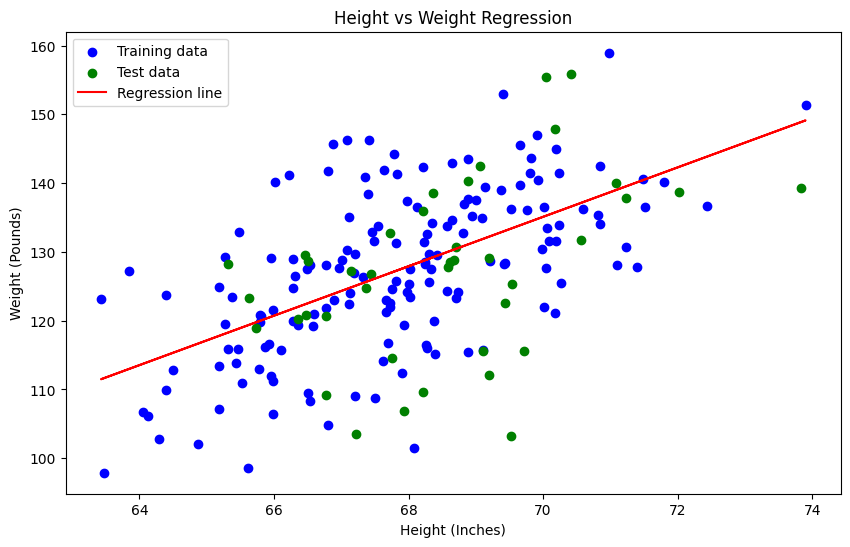

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='green', label='Test data')
plt.plot(X_train, model.predict(X_train), color='red', label='Regression line')

plt.xlabel('Height (Inches)')
plt.ylabel('Weight (Pounds)')
plt.title('Height vs Weight Regression')
plt.legend()
plt.show()

### 5. Hallar correlacion y valor p

In [8]:
# Calcular la correlación de Pearson y el valor p
correlation, p_value = pearsonr(height_weight_df['Height(Inches)'], height_weight_df['Weight(Pounds)'])

print(f'Correlación: {correlation}')
print(f'Valor p: {p_value}')

Correlación: 0.5568647346122992
Valor p: 1.1029015151266312e-17


### 6. Interpretar el valor p

Como el valor p es menor a 0.05, la correlación es estadísticamente significativa.